In [22]:
import pymysql

host = "localhost"
user = "root"
password = "Shelby$1"
database = "Debt_Collection"

# Establish connection
conn = pymysql.connect(host=host, user=user, password=password, database=database)
print("Connected to MySQL successfully!")


Connected to MySQL successfully!


In [23]:
import pandas as pd

In [24]:
query = "Select * from collection_attempts; "
df = pd.read_sql(query, conn)

conn.close()

print(df.head())

   attempt_id  debtor_id  collector_id attempt_date          outcome
0           1        273            22   2023-07-12          Success
1           2        220            20   2023-10-15          Success
2           3        283            41   2023-07-14          Failure
3           4        193            23   2023-08-07  Partial Payment
4           5         72            25   2023-08-11  Partial Payment


C:\Users\Touseef Haider\AppData\Local\Temp\ipykernel_7180\2190685244.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [25]:
print(df.isnull().sum())
df.dropna()

attempt_id      0
debtor_id       0
collector_id    0
attempt_date    0
outcome         0
dtype: int64


,attempt_id,debtor_id,collector_id,attempt_date,outcome
0,1,273,22,2023-07-12,Success
1,2,220,20,2023-10-15,Success
2,3,283,41,2023-07-14,Failure
3,4,193,23,2023-08-07,Partial Payment
4,5,72,25,2023-08-11,Partial Payment
...,...,...,...,...,...
2995,2996,9,9,2023-07-27,No Response
2996,2997,167,13,2023-03-15,Failure
2997,2998,194,5,2023-11-13,No Response
2998,2999,436,21,2023-06-27,Partial Payment


In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = df.drop(columns=['attempt_id'])
le = LabelEncoder()
df['outcome'] = le.fit_transform(df['outcome']) 
df['attempt_date'] = pd.to_datetime(df['attempt_date'])


In [27]:
print(df.dtypes)
print(df.head())

debtor_id                int64
collector_id             int64
attempt_date    datetime64[ns]
outcome                  int64
dtype: object
   debtor_id  collector_id attempt_date  outcome
0        273            22   2023-07-12        3
1        220            20   2023-10-15        3
2        283            41   2023-07-14        0
3        193            23   2023-08-07        2
4         72            25   2023-08-11        2


In [28]:
print(df.isnull().sum())  # Check missing values in each column
df.dropna(inplace=True)
df['outcome'].fillna('Unknown', inplace=True)

debtor_id       0
collector_id    0
attempt_date    0
outcome         0
dtype: int64


C:\Users\Touseef Haider\AppData\Local\Temp\ipykernel_7180\1145514710.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['outcome'].fillna('Unknown', inplace=True)


In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['outcome'] = le.fit_transform(df['outcome'])  # Convert categorical values to numbers

In [30]:
print(df['outcome'].unique())  # Check assigned numerical values


[3 0 2 1]


In [31]:
X = df.drop(columns=['outcome'])  # Features
y = df['outcome']  # Target

In [32]:
X['attempt_date'] = pd.to_datetime(X['attempt_date'])  # Convert to datetime
X['attempt_month'] = X['attempt_date'].dt.month  # Extract month
X['attempt_day'] = X['attempt_date'].dt.day  # Extract day
X['attempt_weekday'] = X['attempt_date'].dt.weekday  # Extract weekday

X = X.drop(columns=['attempt_date'])  # Drop original column after transformation


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")


Training set size: 2400 rows
Testing set size: 600 rows


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Model training complete! ✅")


Model training complete! ✅


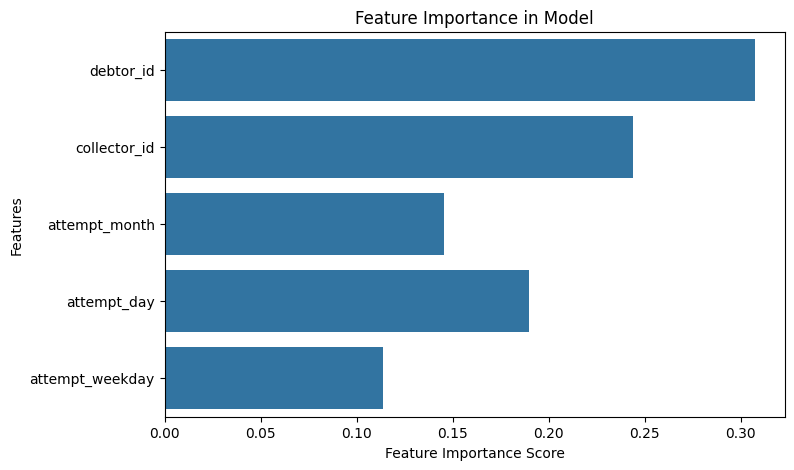

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importance = model.feature_importances_

# Plot importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=X.columns)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Model")
plt.show()

In [36]:
# Predict on test data
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.26


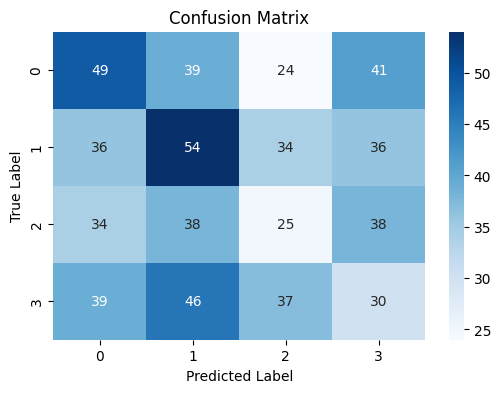

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

C:\Users\Touseef Haider\AppData\Local\Temp\ipykernel_7180\1135097865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Blues")


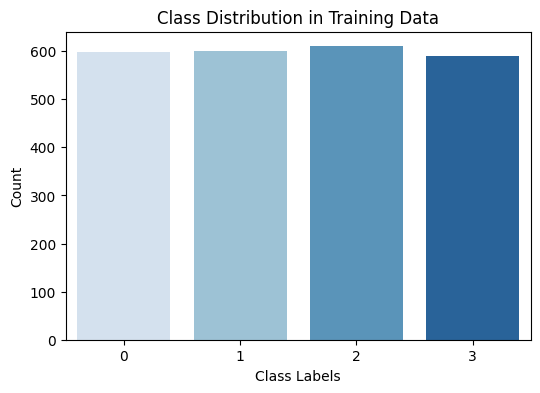

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y_train, palette="Blues")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.title("Class Distribution in Training Data")
plt.show()


<Axes: xlabel='outcome', ylabel='count'>

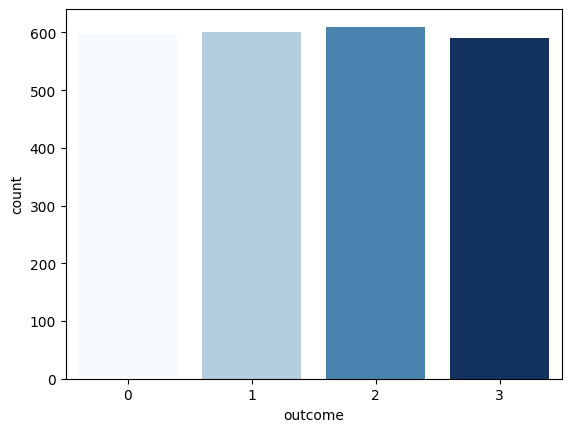

In [40]:
sns.countplot(x=y_train, hue=y_train, palette="Blues", legend=False)


C:\Users\Touseef Haider\AppData\Local\Temp\ipykernel_7180\3348063868.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Blues", edgecolor="black")


<Axes: xlabel='outcome', ylabel='count'>

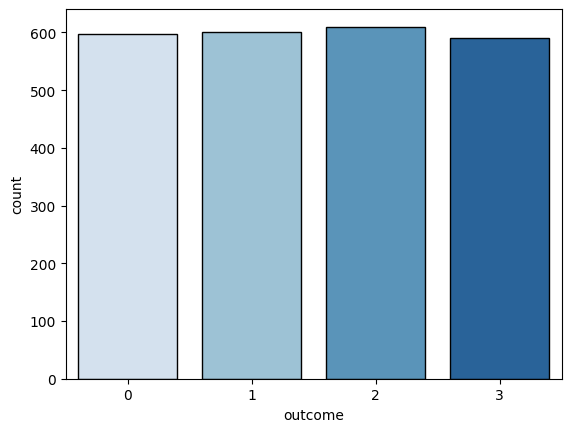

In [41]:
sns.countplot(x=y_train, palette="Blues", edgecolor="black")
